# Problem Set 1 - Neural Network Implementation

Authors: Danial Riaz (201678) and Carlo Greß (216319)
Group PS1 D

As described in section "3 Neural network implementation" of assignment 1, the goal is to build a Feed-forward Neural Network for classification using different approaches. To validate that your code is working and that the network is actually learning something, you can use the MNIST dataset. Finally, please submit proof of the learning progress as described in the assignment.

## Imports

In [82]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from network_scratch import NeuralNetwork
from network_pytorch import NeuralNetworkTorch
from network_tensorflow import NeuralNetworkTf, TimeBasedLearningRate
import utils
import torchvision as tv
import torch

tf.config.run_functions_eagerly(True)

In [70]:
# Automatically load changes in imported modules
%load_ext autoreload
%autoreload 2

# Explicitly set seed for reproducibility
GLOBAL_RANDOM_STATE = 42

random.seed(GLOBAL_RANDOM_STATE)
np.random.seed(GLOBAL_RANDOM_STATE)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## A) Neural Network Classifier from Scratch

### Data


In [71]:
# Download MNIST dataset
x, y = fetch_openml('mnist_784', version=1, return_X_y=True, cache=True, as_frame=False)

# Preprocess dataset
x = (x / 255).astype('float32')
y = tf.keras.utils.to_categorical(y)

# Use only small subset of data for faster training
x = x[:1000]
y = y[:1000]

# Split data into train and validation set
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=GLOBAL_RANDOM_STATE)



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### ML Model & Training

In [72]:
dnn = NeuralNetwork([x_train.shape[1], 2**7, 2**6, 10], learning_rate=1.5, epochs=50)
history = dnn.fit(x_train, y_train, x_val, y_val)

Epoch: 1, Training Time: 0.36s, Training Accuracy: 12.50%, Validation Accuracy: 17.00%
Epoch: 2, Training Time: 0.83s, Training Accuracy: 14.62%, Validation Accuracy: 18.50%
Epoch: 3, Training Time: 1.32s, Training Accuracy: 16.62%, Validation Accuracy: 20.00%
Epoch: 4, Training Time: 1.72s, Training Accuracy: 17.62%, Validation Accuracy: 22.50%
Epoch: 5, Training Time: 2.16s, Training Accuracy: 19.12%, Validation Accuracy: 24.50%
Epoch: 6, Training Time: 2.50s, Training Accuracy: 21.62%, Validation Accuracy: 23.50%
Epoch: 7, Training Time: 2.85s, Training Accuracy: 23.75%, Validation Accuracy: 24.50%
Epoch: 8, Training Time: 3.28s, Training Accuracy: 25.12%, Validation Accuracy: 26.00%
Epoch: 9, Training Time: 3.65s, Training Accuracy: 26.38%, Validation Accuracy: 27.50%
Epoch: 10, Training Time: 4.03s, Training Accuracy: 27.62%, Validation Accuracy: 29.00%
Epoch: 11, Training Time: 4.35s, Training Accuracy: 29.62%, Validation Accuracy: 30.50%
Epoch: 12, Training Time: 4.72s, Training

### Evaluation

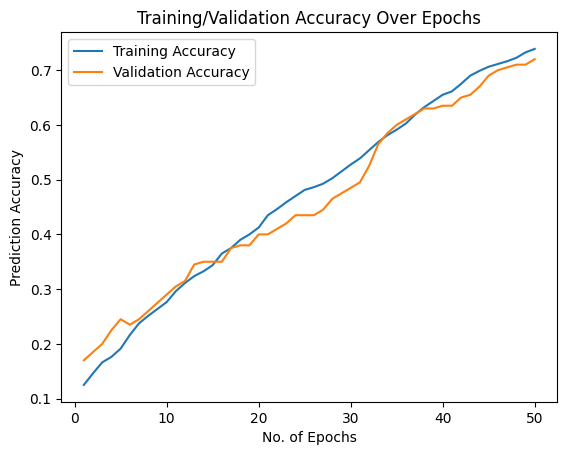

In [73]:
'''TODO: plot accuracy on train and validation set over epochs'''

train_accuracy = history['accuracy']
val_accuracy = history['val_accuracy']

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')

plt.title('Training/Validation Accuracy Over Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Prediction Accuracy')
plt.legend()
plt.show()

## B) Neural Network Classifier using PyTorch

### Data

In [74]:
# Define data preprocessing steps
transform = tv.transforms.Compose([
                tv.transforms.ToTensor(),
                tv.transforms.Normalize((0.5,), (0.5,))
            ])

# Download MNIST dataset
train_set = tv.datasets.MNIST('data', train=True, download=True, transform=transform)
val_set = tv.datasets.MNIST('data', train=False, download=True, transform=transform)

# Use only small subset of data for faster training
train_set = torch.utils.data.Subset(train_set, range(1000))
val_set = torch.utils.data.Subset(val_set, range(1000))

# Utilize PyTorch DataLoader from simplified & harmonized loading of data
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=1)


### ML Model & Training

In [75]:
model = NeuralNetworkTorch(sizes=[784, 2**7, 2**6, 10], learning_rate=1.5, epochs=50, random_state=GLOBAL_RANDOM_STATE)
history_torch = model.fit(train_loader, val_loader)

Epoch: 1, Training Time: 0.48s, Learning Rate: 1.5, Training Accuracy: 55.30%, Validation Accuracy: 50.70%
Epoch: 2, Training Time: 0.93s, Learning Rate: 1.5, Training Accuracy: 60.60%, Validation Accuracy: 53.70%
Epoch: 3, Training Time: 1.39s, Learning Rate: 1.5, Training Accuracy: 62.50%, Validation Accuracy: 57.30%
Epoch: 4, Training Time: 1.85s, Learning Rate: 1.5, Training Accuracy: 69.00%, Validation Accuracy: 59.50%
Epoch: 5, Training Time: 2.30s, Learning Rate: 1.5, Training Accuracy: 58.30%, Validation Accuracy: 52.50%
Epoch: 6, Training Time: 2.74s, Learning Rate: 1.5, Training Accuracy: 67.70%, Validation Accuracy: 62.40%
Epoch: 7, Training Time: 3.18s, Learning Rate: 1.5, Training Accuracy: 68.10%, Validation Accuracy: 59.10%
Epoch: 8, Training Time: 3.63s, Learning Rate: 1.5, Training Accuracy: 64.60%, Validation Accuracy: 58.80%
Epoch: 9, Training Time: 4.07s, Learning Rate: 1.5, Training Accuracy: 64.70%, Validation Accuracy: 56.40%
Epoch: 10, Training Time: 4.51s, Lear

### Evaluation

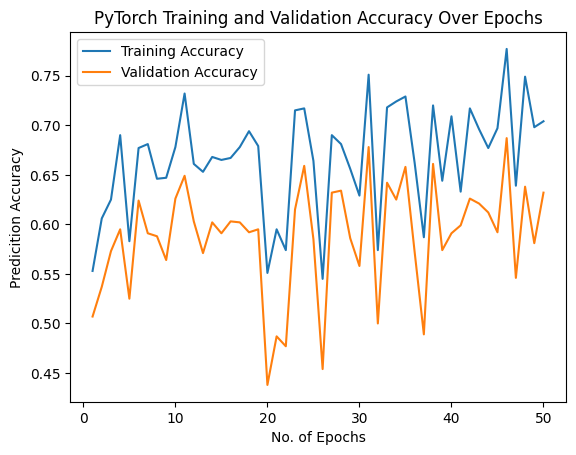

In [10]:
'''TODO: plot accuracy on train and validation set over epochs'''

train_accuracy = history_torch['accuracy']
val_accuracy = history_torch['val_accuracy']

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')

plt.title('PyTorch Training and Validation Accuracy Over Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Predicition Accuracy')
plt.legend()

plt.show()

As we can see from the plot, both the training and the validation accuracy quickly approaches 65 to 70 per cent. However, it does not improve significantly anmymore after a small number of epochs. Most likely, the model encountered a local minimum. Decreasing the learning rate might improve the performance. However, we were not sure whether we should adapt the given code her, and therefore kept it at the original learning rate.

## C) Neural Network Classifier using Keras

### Data

In [78]:
# Download MNIST dataset
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data()

# Preprocess dataset
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)

# Use only small subset of data for faster training

x_train = x_train[:1000]
y_train = y_train[:1000]

x_val = x_val[:1000]
y_val = y_val[:1000]


### ML Model & Training

Here, however, we decided to tune the initial learning rate, decay, and minimum learning rate because of the original model seemed to be stuck in a minimum and was performing very poorly (as can be seen in the plot). We were not sure, how to pick the best values, and ended up using 1/10 of the original values. There are probably more sophisticated approaches to determine reasonable parameter values, but using 1/10 of the original values produced acceptable results.

In [86]:
model_tf = NeuralNetworkTf(sizes=[784, 2**7, 2**5, 10])
tb_learning_rate = TimeBasedLearningRate(initial_learning_rate=10, decay=1, min_learning_rate=1)
tb_learning_rate_corrected_version = TimeBasedLearningRate(initial_learning_rate=1, decay=0.1, min_learning_rate=0.1)

In [85]:
history_tf = model_tf.compile_and_fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, learning_rate=tb_learning_rate, batch_size=1)

Epoch 1/50
  20/1000 [..............................] - ETA: 5s - loss: 35.7640 - accuracy: 0.0000e+00

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1000/1000 [==============================] - 7s 7ms/step - loss: 9.6172 - accuracy: 0.0950 - val_loss: 9.0605 - val_accuracy: 0.0890
Epoch 2/50
1000/1000 [==============================] - 7s 7ms/step - loss: 8.3422 - accuracy: 0.1120 - val_loss: 8.0295 - val_accuracy: 0.0870
Epoch 3/50
1000/1000 [==============================] - 7s 7ms/step - loss: 8.0470 - accuracy: 0.1060 - val_loss: 8.2039 - val_accuracy: 0.0870
Epoch 4/50
1000/1000 [==============================] - 7s 7ms/step - loss: 8.1640 - accuracy: 0.0930 - val_loss: 8.1554 - val_accuracy: 0.0940
Epoch 5/50
1000/1000 [==============================] - 7s 7ms/step - loss: 8.0382 - accuracy: 0.1070 - val_loss: 7.9837 - val_accuracy: 0.1100
Epoch 6/50
1000/1000 [==============================] - 7s 7ms/step - loss: 8.0381 - accuracy: 0.1070 - val_loss: 8.0268 - val_accuracy: 0.1100
Epoch 7/50
1000/1000 [==============================] - 7s 7ms/step - loss: 8.0740 - accuracy: 0.1030 - val_loss: 7.9605 - val_accuracy: 0.1260
Epo

### Evaluation

In [87]:
history_tf_corrected = model_tf.compile_and_fit(x_train, y_train, validation_data=(x_val, y_val), learning_rate=tb_learning_rate_corrected_version, epochs=50, batch_size=1)

Epoch 1/50
1000/1000 [==============================] - 8s 8ms/step - loss: 2.3436 - accuracy: 0.0880 - val_loss: 2.3124 - val_accuracy: 0.1100
Epoch 2/50
1000/1000 [==============================] - 8s 8ms/step - loss: 2.3219 - accuracy: 0.1210 - val_loss: 2.3470 - val_accuracy: 0.0870
Epoch 3/50
1000/1000 [==============================] - 8s 8ms/step - loss: 2.3231 - accuracy: 0.1000 - val_loss: 2.3331 - val_accuracy: 0.1100
Epoch 4/50
1000/1000 [==============================] - 8s 8ms/step - loss: 2.3243 - accuracy: 0.1090 - val_loss: 2.3228 - val_accuracy: 0.0940
Epoch 5/50
1000/1000 [==============================] - 8s 8ms/step - loss: 2.3241 - accuracy: 0.1000 - val_loss: 2.3149 - val_accuracy: 0.1070
Epoch 6/50
1000/1000 [==============================] - 8s 8ms/step - loss: 2.3263 - accuracy: 0.1050 - val_loss: 2.3094 - val_accuracy: 0.1260
Epoch 7/50
1000/1000 [==============================] - 8s 8ms/step - loss: 2.3201 - accuracy: 0.1000 - val_loss: 2.3046 - val_accuracy:

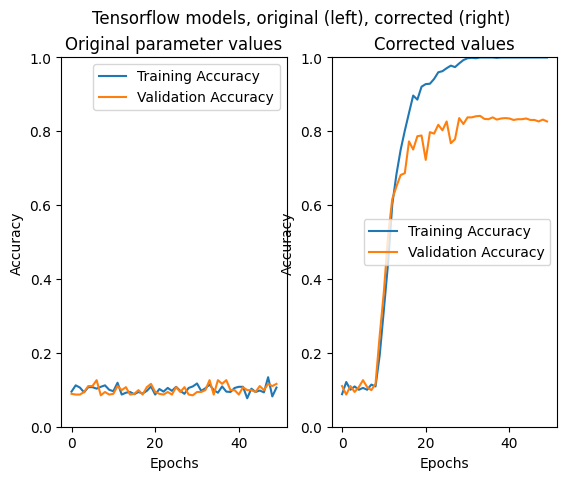

In [96]:
'''TODO: plot accuracy on train and validation set over epochs'''
fig, axes = plt.subplots(nrows=1, ncols=2)

# Original values 

axes[0].plot(history_tf.history['accuracy'], label='Training Accuracy')
axes[0].plot(history_tf.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Original parameter values')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Corrected model with new learning rate parameter values

axes[1].plot(history_tf_corrected.history['accuracy'], label='Training Accuracy')
axes[1].plot(history_tf_corrected.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Corrected values')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[0].set_ylim([0, 1])
axes[1].set_ylim([0, 1])

plt.suptitle('Tensorflow models, original (left), corrected (right)')

plt.show()

In the corrected version, the validation accuracy increases to around 80 per cent, while it was stuck at around 10 per cent in the originally specified model. 